In [106]:
import pandas as pd
import numpy as np
from sklearn import linear_model #scikit-learn
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('nba.csv', sep=';')
df = df.drop(columns=['Team', 'GP', 'WIN%', 'FG%', '3P%', 'FT%', 'L', '3PA', 'FTA']) # poistetaan sarakkeita joilla ei ole vaikutusta lopputulokseen
df = df.astype(dtype='float64')
#df.describe()


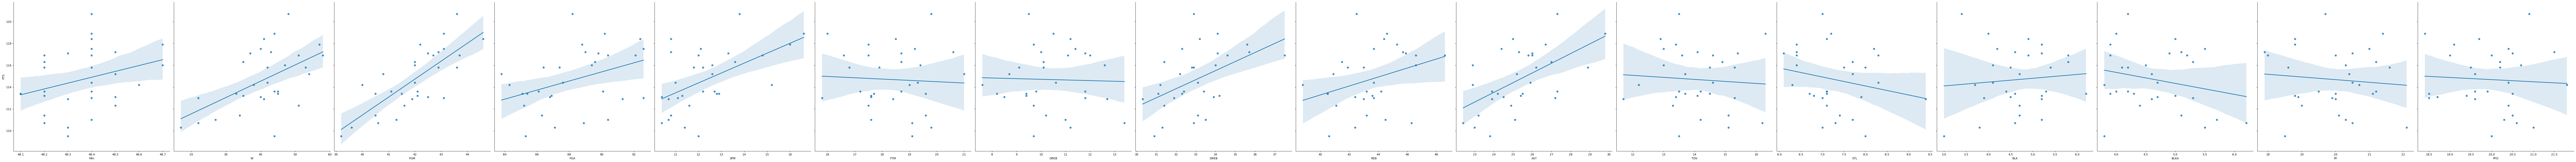

In [117]:
sns.pairplot(df,
            x_vars=['Min', 'W', 'FGM', 'FGA', '3PM', 'FTM', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD'],
            y_vars='PTS',
            height=8,
            kind='reg')




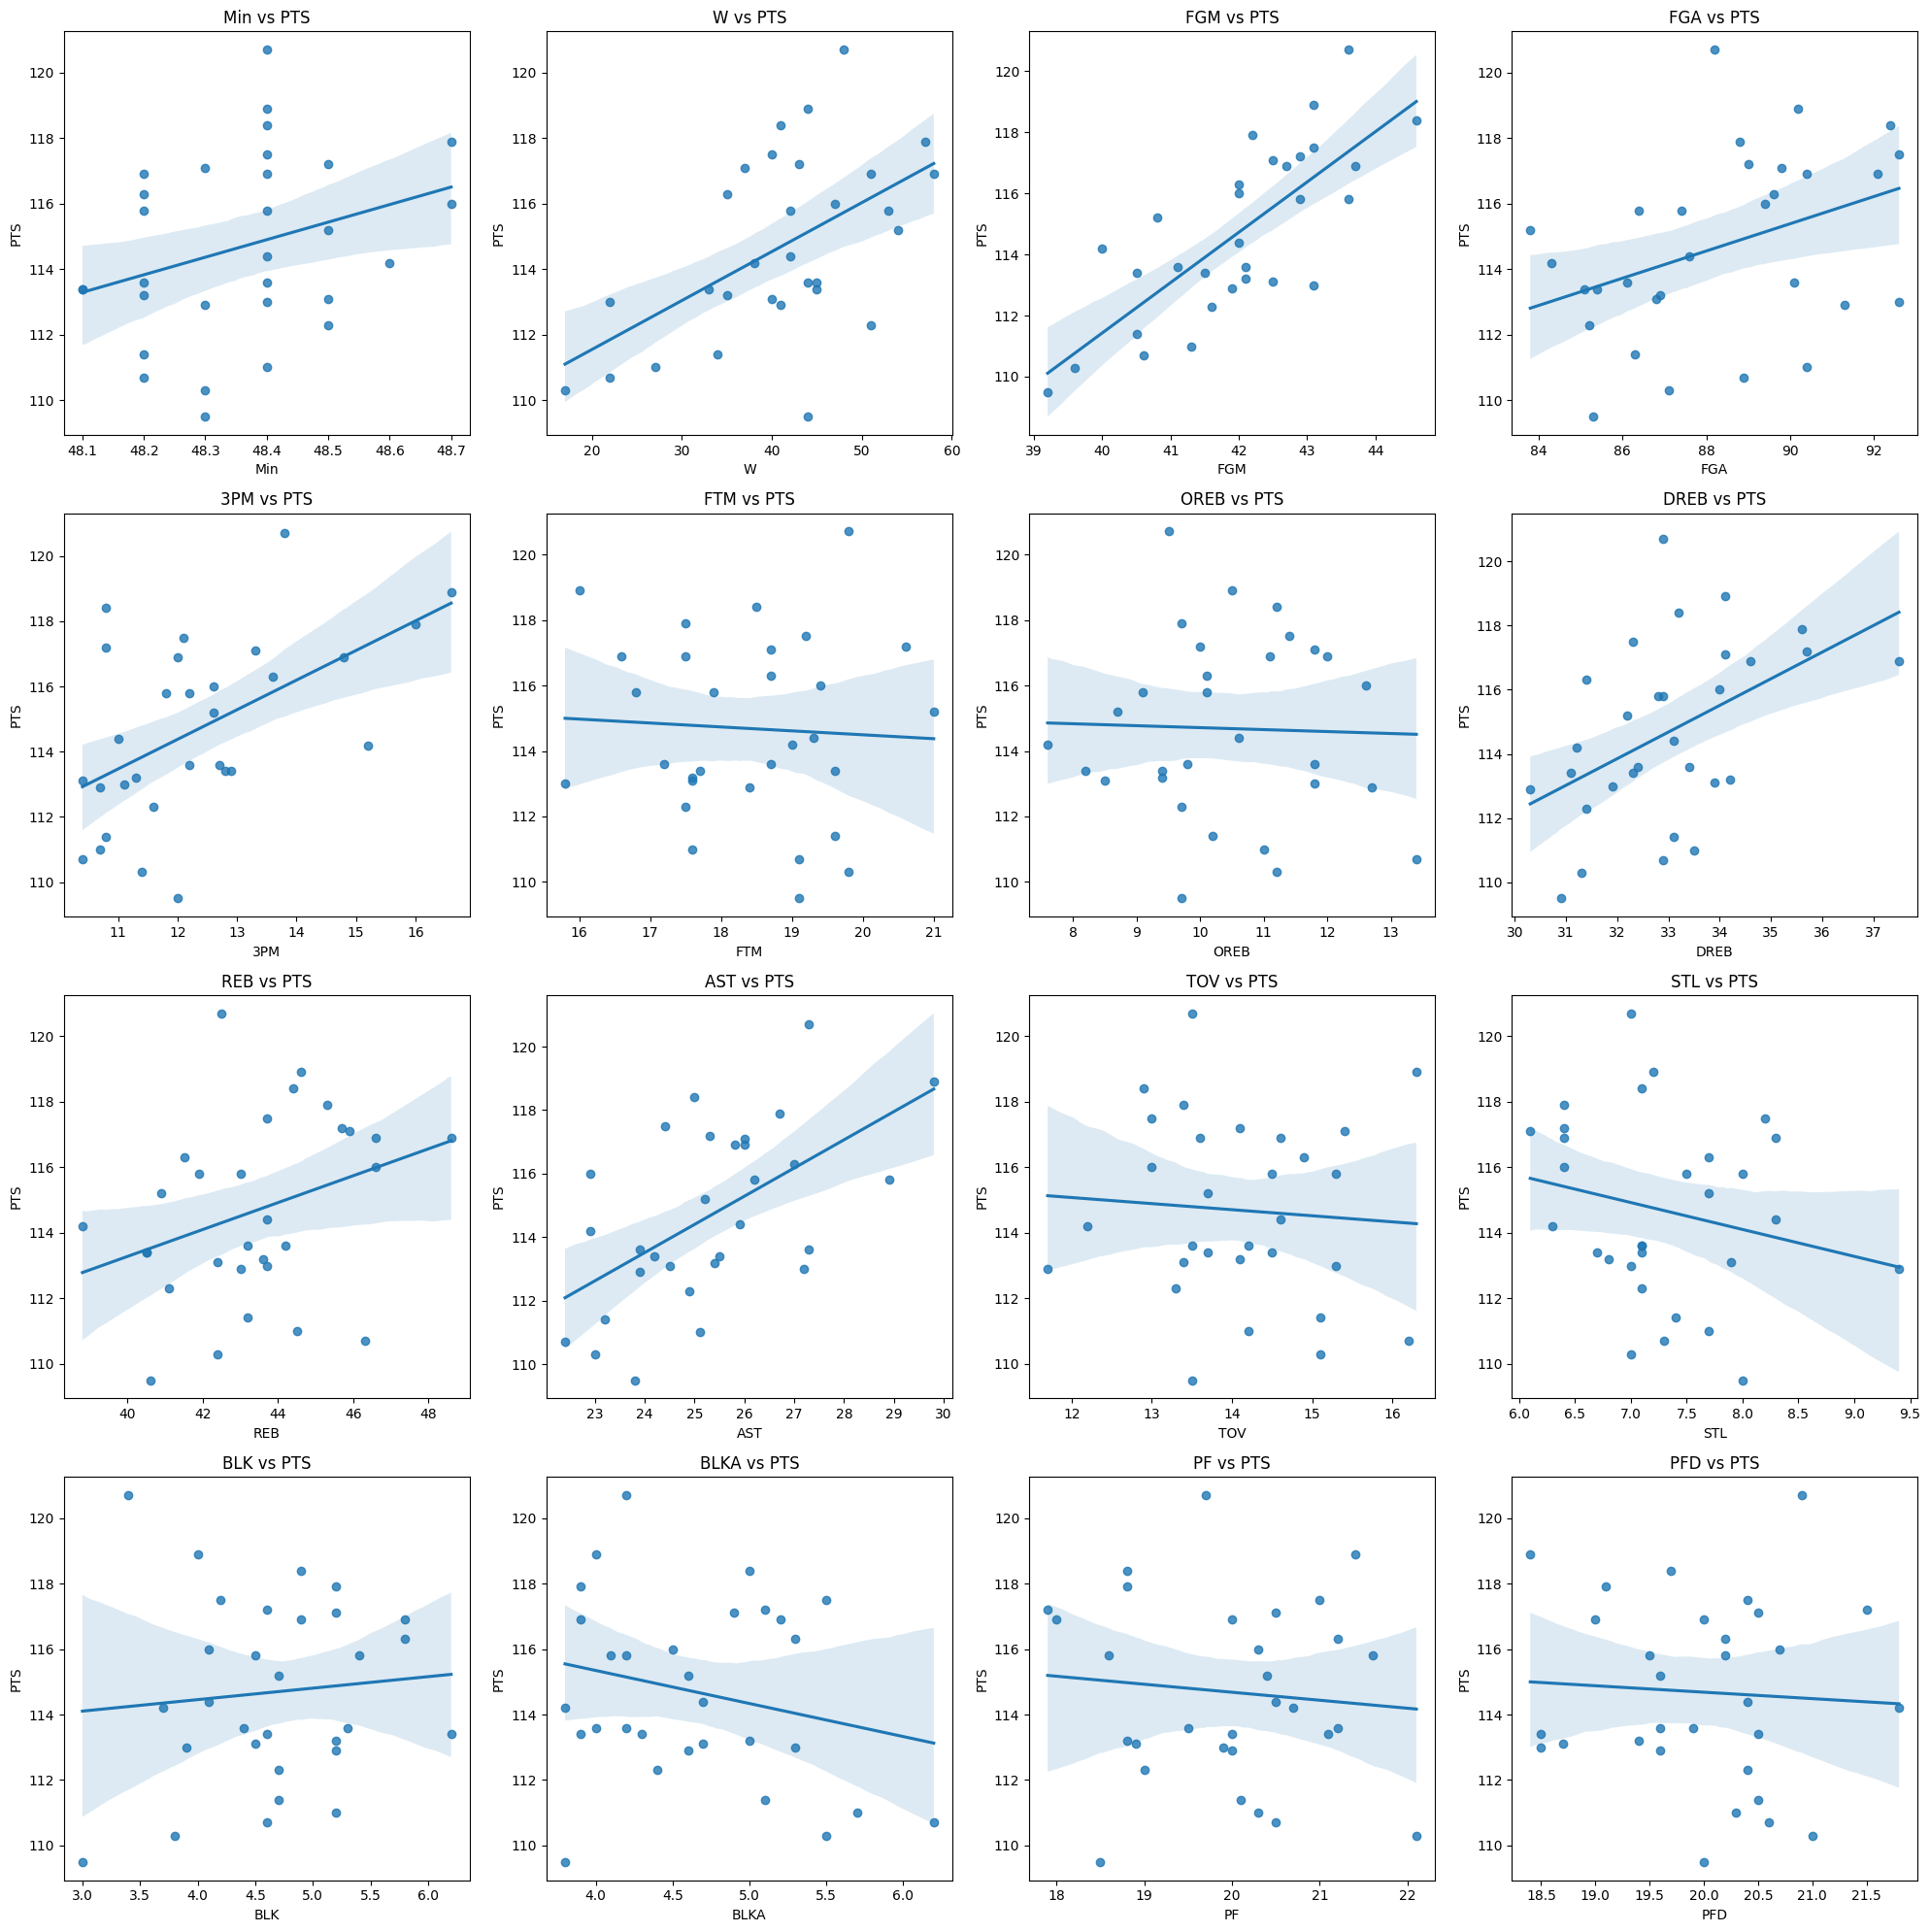

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Oletetaan, että df on datakehys
x_vars = ['Min', 'W', 'FGM', 'FGA', '3PM', 'FTM', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']

# Määritä rivi ja sarake -lukumäärä
num_cols = 4
num_rows = int(np.ceil(len(x_vars) / num_cols))

# Luo alikuvasto
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Muokkaa akselit listaksi
axes = axes.flatten()

# Piirrä kuvaajat
for i, x_var in enumerate(x_vars):
    sns.regplot(x=x_var, y='PTS', data=df, ax=axes[i])
    axes[i].set_title(f'{x_var} vs PTS')

# Poista ylimääräiset akselit, jos on tyhjää
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


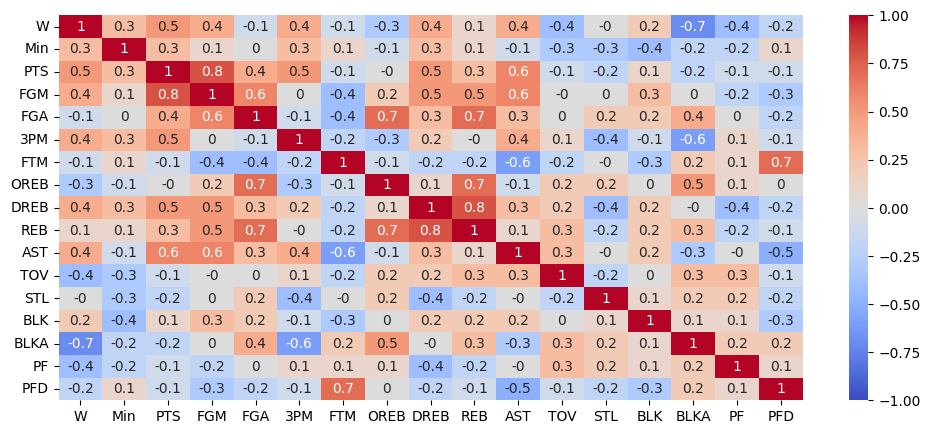

In [115]:
plt.figure(figsize=(12, 5))
sns.heatmap(kor.round(1), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     float64
 1   Min     30 non-null     float64
 2   PTS     30 non-null     float64
 3   FGM     30 non-null     float64
 4   FGA     30 non-null     float64
 5   3PM     30 non-null     float64
 6   FTM     30 non-null     float64
 7   OREB    30 non-null     float64
 8   DREB    30 non-null     float64
 9   REB     30 non-null     float64
 10  AST     30 non-null     float64
 11  TOV     30 non-null     float64
 12  STL     30 non-null     float64
 13  BLK     30 non-null     float64
 14  BLKA    30 non-null     float64
 15  PF      30 non-null     float64
 16  PFD     30 non-null     float64
dtypes: float64(17)
memory usage: 4.1 KB


In [124]:
# valmistellaan datan mallinnusta varten

X = df.drop(columns=['PTS']) # valitaan kaikki muut paitsi PTS
Y = df[['PTS']] # valitaan PTS
print(X.to_string())
print(Y)

       W   Min   FGM   FGA   3PM   FTM  OREB  DREB   REB   AST   TOV  STL  BLK  BLKA    PF   PFD
0   41.0  48.4  44.6  92.4  10.8  18.5  11.2  33.2  44.4  25.0  12.9  7.1  4.9   5.0  18.8  19.7
1   57.0  48.7  42.2  88.8  16.0  17.5   9.7  35.6  45.3  26.7  13.4  6.4  5.2   3.9  18.8  19.1
2   45.0  48.1  41.5  85.1  12.8  17.7   8.2  32.3  40.5  25.5  13.7  7.1  6.2   3.9  21.1  18.5
3   27.0  48.4  41.3  90.4  10.7  17.6  11.0  33.5  44.5  25.1  14.2  7.7  5.2   5.7  20.3  20.3
4   40.0  48.5  42.5  86.8  10.4  17.6   8.5  33.9  42.4  24.5  13.4  7.9  4.5   4.7  18.9  18.7
5   51.0  48.5  41.6  85.2  11.6  17.5   9.7  31.4  41.1  24.9  13.3  7.1  4.7   4.4  19.0  20.4
6   38.0  48.6  40.0  84.3  15.2  19.0   7.6  31.2  38.8  22.9  12.2  6.3  3.7   3.8  20.7  21.8
7   53.0  48.2  43.6  86.4  11.8  16.8  10.1  32.9  43.0  28.9  14.5  7.5  4.5   4.2  18.6  19.5
8   17.0  48.3  39.6  87.1  11.4  19.8  11.2  31.3  42.4  23.0  15.1  7.0  3.8   5.5  22.1  21.0
9   44.0  48.4  43.1  90.2  16

In [127]:
# mallinnus
reg = linear_model.LinearRegression()

#sovitetaan arvot malliin
reg.fit(X, Y)
print(reg.feature_names_in_)
print("coefficients / eri kulmakertoimet", reg.coef_)
print("intercepts / vakiotermi", reg.intercept_)

['W' 'Min' 'FGM' 'FGA' '3PM' 'FTM' 'OREB' 'DREB' 'REB' 'AST' 'TOV' 'STL'
 'BLK' 'BLKA' 'PF' 'PFD']
coefficients / eri kulmakertoimet [[-0.00221272  0.03798188  1.97311612 -0.01866967  1.01143965  0.98078578
  -0.13996333 -0.11491117  0.15968446  0.01995226 -0.0292021   0.04990148
  -0.0050685   0.04346665 -0.00317705  0.01175358]]
intercepts / vakiotermi [-1.24667288]
